# Unscented Kalman filter analysis

In [110]:
%matplotlib inline
import numpy as np
import pandas
from scipy import stats
from matplotlib import pyplot as plt;

In [92]:
df = pandas.read_csv("build/dump.csv", header=None, 
                     names=['Sensor', 'px', 'py', 'vx', 'vy', "px_est", 'py_est', 'vx_est', 'vy_est', 'NIS'])
df.head()

,Sensor,px,py,vx,vy,px_est,py_est,vx_est,vy_est,NIS
0,L,0.600000,0.600000,5.19994,0.000000,0.312243,0.580340,10.00000,0.000000,0.000000
1,R,0.859997,0.600045,5.19975,0.001797,0.709354,0.449493,7.37688,-1.682980,0.862666
2,L,1.119980,0.600225,5.19943,0.005390,1.148200,0.462902,8.53010,-1.517070,0.260992
3,R,1.379960,0.600629,5.19898,0.010778,1.258310,0.546112,5.06182,0.150150,2.787380
4,L,1.639900,0.601347,5.19839,0.017960,1.567220,0.559973,5.21891,0.113501,0.761766


In [93]:
df.describe()

,px,py,vx,vy,px_est,py_est,vx_est,vy_est,NIS
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,-3.182320,5.742852,-0.303756,0.413017,-3.179109,5.696077,-0.212046,0.244842,4.964712
std,15.220143,9.125098,3.732661,3.296976,15.222601,9.096976,3.692810,3.235084,6.345895
min,-26.650000,-9.627170,-4.880530,-4.909760,-26.622500,-9.558450,-5.462450,-5.312570,0.000000
25%,-16.843000,-0.244976,-3.660375,-2.799180,-16.801500,-0.270703,-3.472035,-2.952130,1.304195
50%,-3.147090,5.684140,-1.786860,0.774927,-3.028320,5.733650,-1.483160,0.673111,2.996160
75%,10.463200,11.751300,3.976090,3.430685,10.427000,11.734400,3.942410,3.154455,6.275645
max,20.270100,21.133500,5.199940,4.834390,20.283300,21.061600,10.000000,5.201670,53.686000


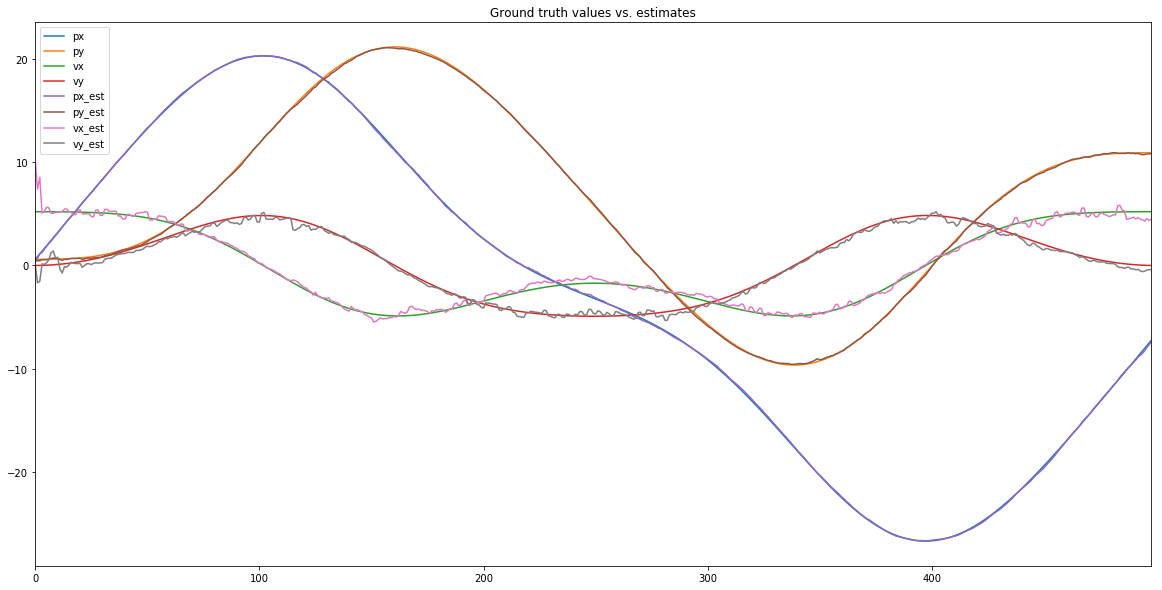

In [99]:
_ = df[df.columns[1:9]].plot(figsize=(20, 10), title="Ground truth values vs. estimates")

## NIS RADAR

In [144]:
chi2_radar_threshold = stats.chi2(3).ppf(0.95)
chi2_radar_threshold

7.8147279032511765

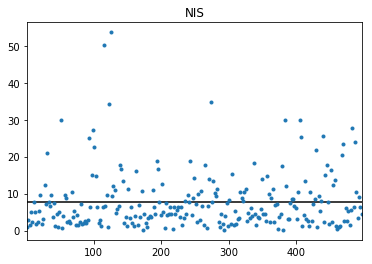

In [145]:
plt.hlines(chi2_radar_threshold, 0, 1000)
_ = df[df.Sensor == 'R'].NIS.plot(title='NIS', style='.')

## NIS LIDAR

In [146]:
chi2_lidar_threshold = stats.chi2(2).ppf(0.95)
chi2_lidar_threshold

5.9914645471079799

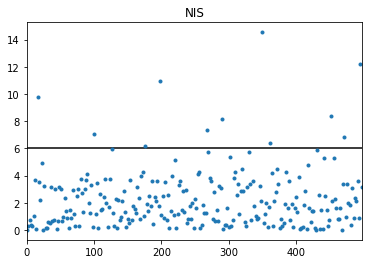

In [147]:
plt.hlines(chi2_lidar_threshold, 0, 1000)
_ = df[df.Sensor == 'L'].NIS.plot(title='NIS', style='.')